In [13]:
import pandas as pd

In [14]:
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator

In [15]:
import  numpy as np
import NCBITaxonomy
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import os
from BCBio import GFF

In [17]:
files=os.listdir("./longest_contigs_annotation/prodigal/") #set path to prodigal results

In [18]:
files

['SRR8487034_NODE_675_length_12199_cov_4.254059.gff',
 'SRR8487018_NODE_178_length_38066_cov_1.509687.gff',
 'SRR8487023_NODE_34_length_54070_cov_1.612776.gff',
 'SRR8487039_NODE_169_length_6173_cov_1.526960.gff',
 'SRR8487018_NODE_3613_length_5463_cov_1.315030.gff',
 'SRR8487034_NODE_791_length_11206_cov_1.490297.gff',
 'SRR8487014_NODE_14951_length_1920_cov_0.588399.gff',
 'SRR8487035_NODE_1972_length_7553_cov_2.224751.gff',
 'SRR8487023_NODE_559_length_15966_cov_1.798283.gff',
 'SRR8487023_NODE_703_length_13740_cov_2.405642.gff',
 'SRR8487027_NODE_8_length_8004_cov_0.888917.gff',
 'SRR8487039_NODE_286_length_5345_cov_0.989076.gff',
 'SRR8487021_NODE_16_length_60564_cov_7.797045.gff']

In [19]:
#set path to phrogs annotations
phrogs_anno=pd.read_table('/home/yasas/Desktop/PhageRemoteOG/Metadata/phrog_annot_v3.tsv', index_col=0)
phrogs_anno=phrogs_anno.fillna('unknown function')

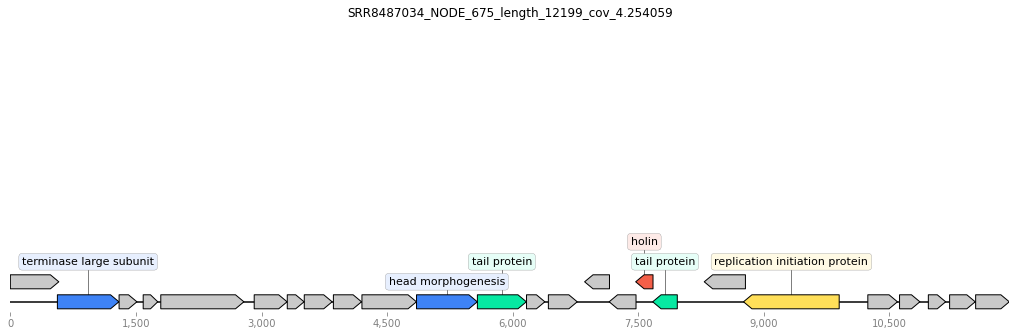

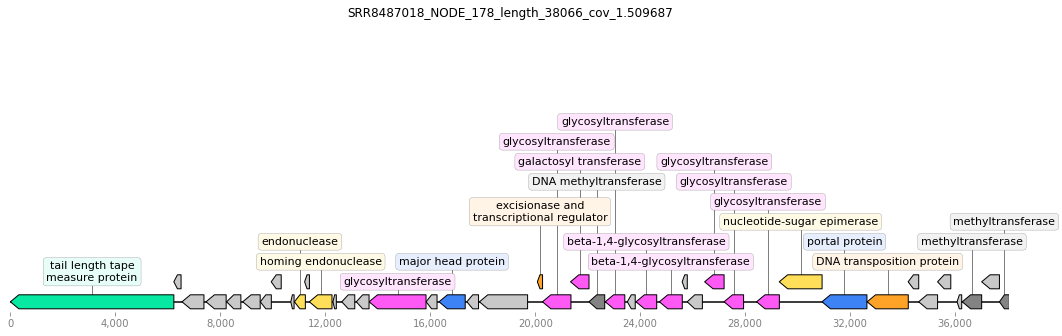

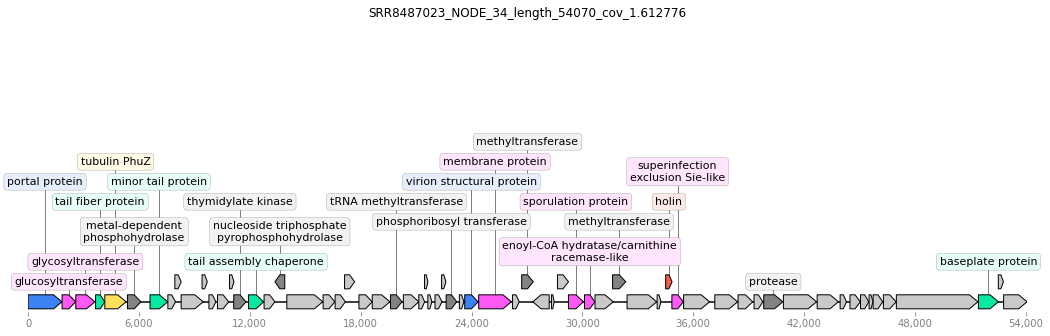

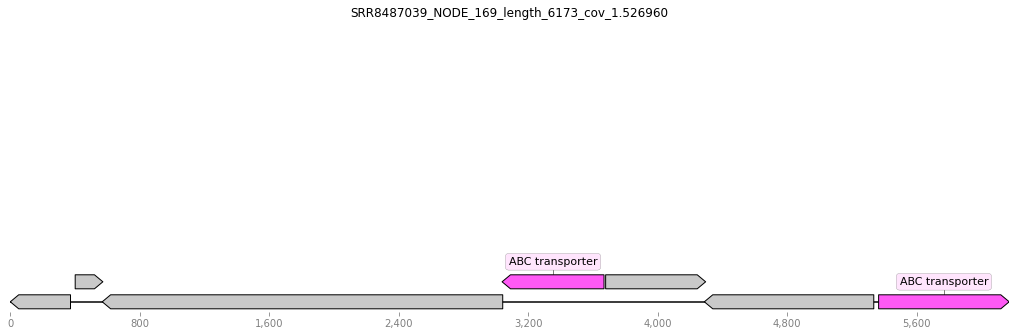

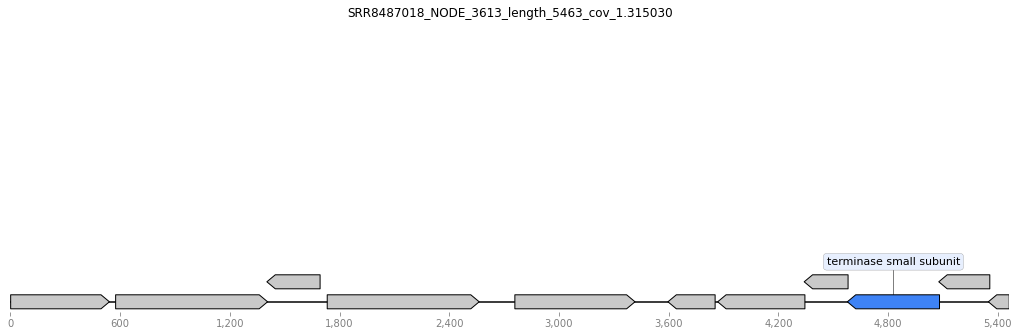

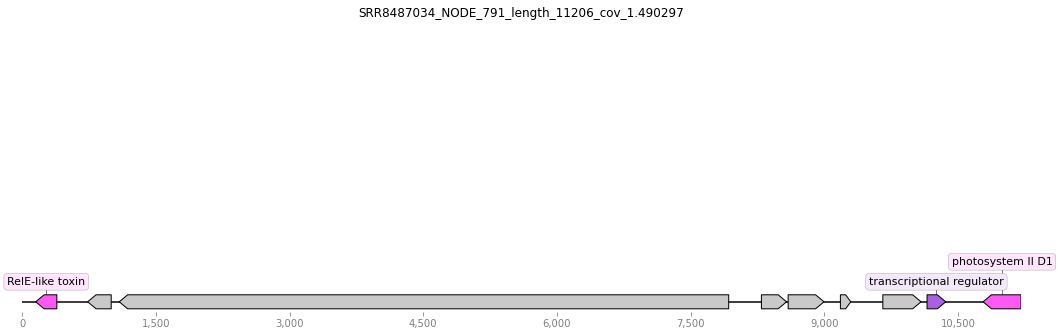

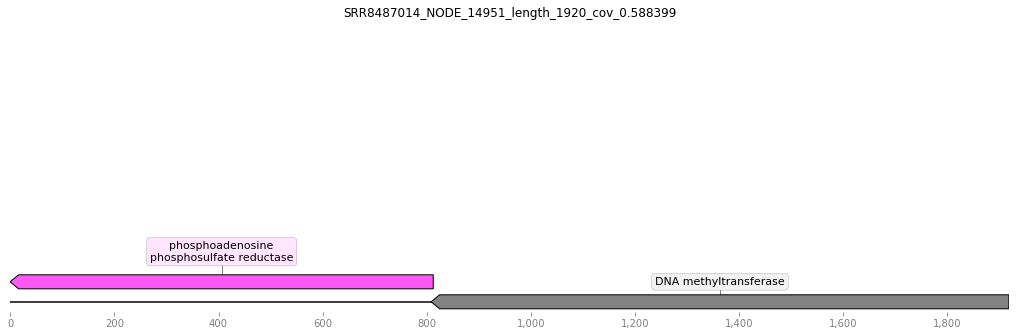

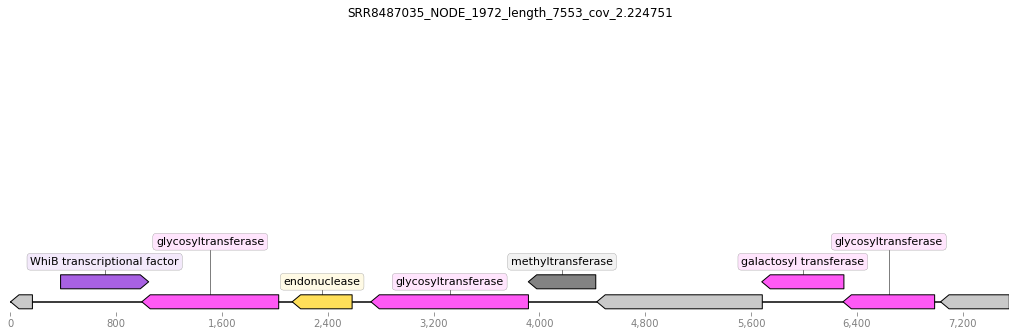

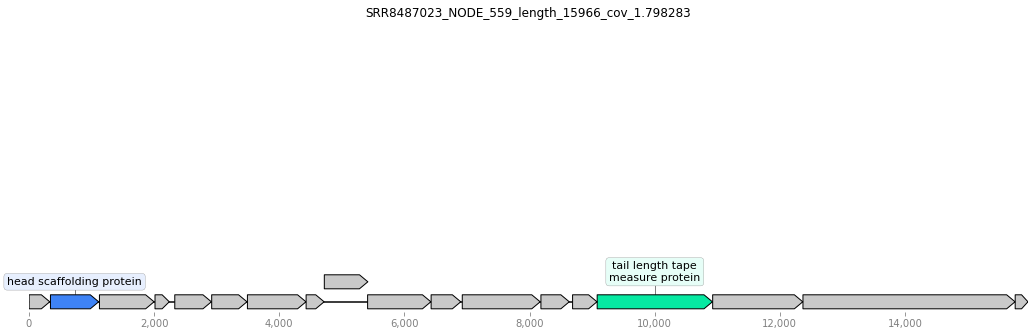

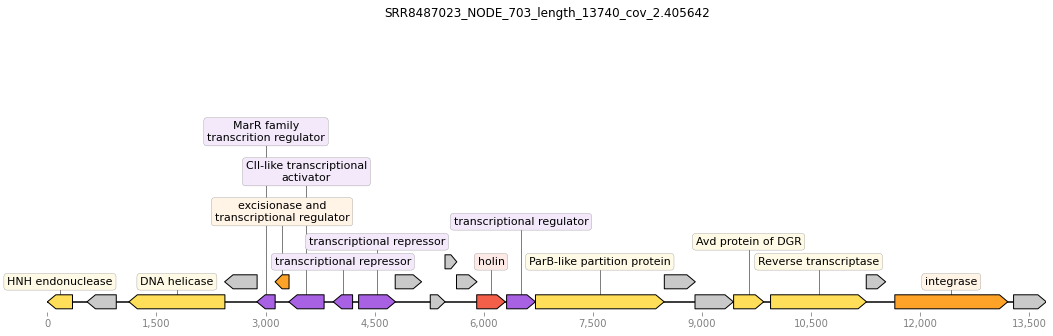

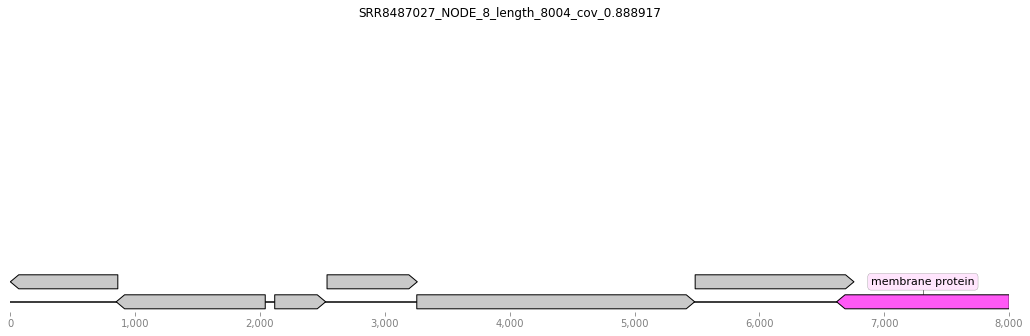

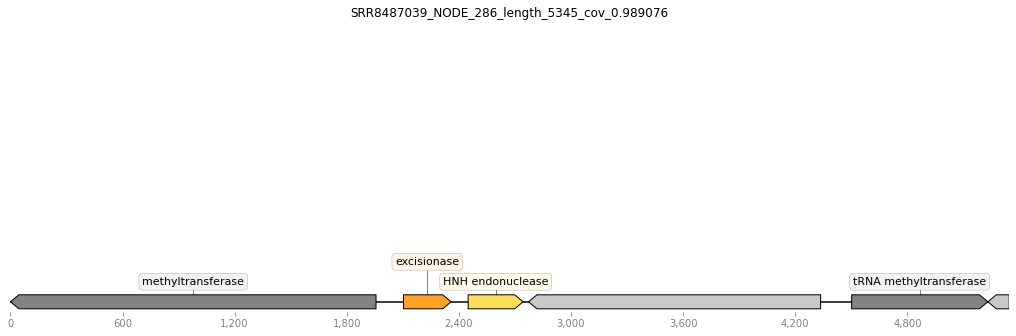

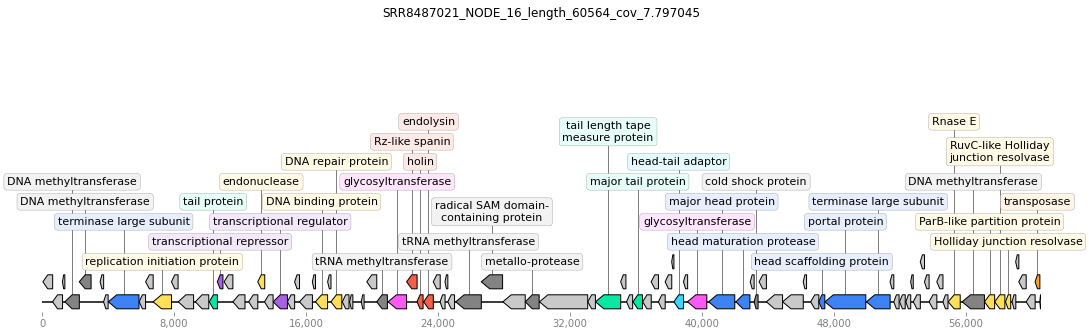

In [20]:

for f in files:
    in_file = "./longest_contigs_annotation/prodigal/"+f

    in_handle = open(in_file)
    #rec = next(GFF.parse(in_handle))
    in_hhsearch= f"./longest_contigs_annotation/hhsearch/"+f.rsplit(".",1)[0] #set path to hhsearch results
    
    colors = []
    anno = []

    import re
    for x in range(1,2000):
        try:
            with open(f"{in_hhsearch}_{x}.txt", "r") as fh:

                    for i in fh:
                        #print(i)
                        m=re.match(r'^\s+1\s',i)
                        if m:
                            colors.append(phrogs_anno.loc[int(i.split()[1].split('_')[-1])]['color'])
                            anno.append(phrogs_anno.loc[int(i.split()[1].split('_')[-1])]['annot'])
        except:
            break
            
    records = [ record for record in GFF.parse(in_handle)]
   
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
    fig.tight_layout(pad=2.5) 

    rec = records[0]
    graphic_record = BiopythonTranslator().translate_record(rec)

    for feat,c_,a_ in zip(graphic_record.features,colors,anno):
        if a_ != "unknown function":
            feat.label = a_
            feat.color = c_
        else:
            feat.color = c_
            feat.label = None
        
    ax, _ = graphic_record.plot(ax=ax1, strand_in_label_threshold=7,annotate_inline=False,figure_height=5 )
    ax.set_title(f'{rec.id}')
    in_hhsearch
    ax.figure.savefig(f'./figures/{f.rsplit(".",1)[0]}.png', bbox_inches='tight')